<font size = '8'>BDS 516 Homework 6: Credit Card Application Prediction</font>

In this exercise, we will run an analysis on how to predict a bank's customer credit card application. The result of this analysis will be a machine learning model, resulting in a value of "Approved" or "Rejected", to predict all upcoming credit card application. We will try different models to predict customers' credit card application and use the best fitting model. The section of this analysis document is as follows: data manipulation, data visualization, data standardization, machine learning models, and conclusion.

We start with importing all the necessary libraries to upload the data into the Python environment, clean them, and plot them into charts to better understand the data.

In [1]:
#import all necessary libraries for data cleaning
import pandas as pd #For working with dataframes
import numpy as np #For working with arrays, pandas is built on top of this
from pprint import pprint #For printing things nicely
import matplotlib.pyplot as plt #For plotting
import seaborn as sns

%matplotlib inline

sns.set_style(style="whitegrid")

#Uploading the data and data manipulation

Now, let's upload the data into the environment and take a look of the data that we will be working with.

In [2]:
crx_data = pd.read_csv("crx.data.csv",
                       index_col=False,
                       names=["Male", "Age", "Debt","Married", "BankCustomer","EducationLevel","Ethnicity","YearsEmployed",
                              "PriorDefault","Employed","CreditScore","DriversLicense","Citizen","ZipCode","Income","Approved"])
crx_data.head()

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


It looks like we are working with both categorical and continous variables/columns from the dataset that we have uploaded. Let's take a look on what are the data types for each of the column.

In [3]:
#make a copy and take a look on each column data type
crx_data_clean = crx_data.copy()
crx_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Male            690 non-null    object 
 1   Age             690 non-null    object 
 2   Debt            690 non-null    float64
 3   Married         690 non-null    object 
 4   BankCustomer    690 non-null    object 
 5   EducationLevel  690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    object 
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    object 
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


From the result above, there are a total of 15 columns, including 1 dependend variable called "Approved." However, some of the columns seem to have a wrong data type, for example the variable age is considered as an object or string instead of float. Before we start changing all the columns data type to the correct one, we should find explore whether if there are missing values in any of our columns.

In [104]:
#check NA
print(crx_data_clean.isnull().sum())

#check value format for variable 'Age'
print(crx_data_clean.Age.value_counts())

Male              0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64
?        12
22.67     9
20.42     7
18.83     6
24.50     6
         ..
48.25     1
28.33     1
18.75     1
18.50     1
36.42     1
Name: Age, Length: 350, dtype: int64


It seems Python does not identify any missing values (NaN) in any of the columns. However, if we take a look on the values of the 'Age' variable, we can see that there are 12 rows of data that contains '?' instead of NaN or age number. We will not be able to convert this variable data type into float right now since there is a '?' value which considered as a string. Before we convert the '?' into NaN, we should take a look whether the other columns have the same problem or not. 

In [100]:
#there are 12 rows that contains '?' for age
#crx_data_clean.groupby(['Age'])['Age'].count()
crx_data_clean.Age.value_counts()

?        12
22.67     9
20.42     7
18.83     6
24.50     6
         ..
48.25     1
28.33     1
18.75     1
18.50     1
36.42     1
Name: Age, Length: 350, dtype: int64

In [101]:
#the number of columns that contain '?'
crx_data_clean[crx_data_clean == '?'].count()

Male              12
Age               12
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           13
Income             0
Approved           0
dtype: int64

It looks like our intuition is correct! There are multiple columns that contains '?' as one of the value. Now we have identified all the '?' values, we can first transform them into a NaN value before we fill them with other values in order to run our machine learning models.

In [106]:
cols = ["Male","Age","Married","BankCustomer","EducationLevel","Ethnicity","ZipCode"]
crx_data_clean[cols] = crx_data_clean[cols].replace({'?':np.nan, 0:np.nan})

Now once we have remove all the '?' values, we can start manipulating our data in order to fit them into machine learning models. First, we should transform all the supposedly continous variables, such as age and approved, into the correct data type, float. 

In [ ]:
#change the "Approved" column value, '+' into 1, '-' into 0, and "Male" column value to 1 & 0
crx_data_filtered['Approved'] = crx_data_filtered['Approved'].map({'+': 1, '-': 0})

In [5]:
#there are 12 rows that contains '?' for gender
crx_data_clean.groupby(['Male'])['Male'].count()

Male
?     12
a    210
b    468
Name: Male, dtype: int64

In [6]:
#change '?' to 0 for column age
crx_data_filtered = crx_data_clean.copy()
crx_data_filtered.loc[ crx_data_filtered['Age'] == '?', 'Age'] = '0'

#and then double check if all '?' have changed to 0
crx_data_filtered.groupby(['Age'])['Age'].count()

Age
0        12
13.75     1
15.17     1
15.75     1
15.83     2
         ..
71.58     1
73.42     1
74.83     1
76.75     1
80.25     1
Name: Age, Length: 350, dtype: int64

In [7]:
#change the "Approved" column value, '+' into 1, '-' into 0, and "Male" column value to 1 & 0
crx_data_filtered['Approved'] = crx_data_filtered['Approved'].map({'+': 1, '-': 0})

In [8]:
#change the "Age" column from string to float
crx_data_filtered['Age'] = crx_data_filtered['Age'].astype(float)

#then double check if column 'Age' has changed to float
crx_data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Male            690 non-null    object 
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    object 
 4   BankCustomer    690 non-null    object 
 5   EducationLevel  690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    object 
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    object 
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(3), object(10)
memory usage: 86.4+ KB


In [9]:
crx_data_filtered_copy = crx_data_filtered.copy()

In [10]:
#group by age and count 
crx_data_filtered_copy.groupby(['Age'])['Age'].count()

#drop categorical columns from the df so we can run a regression analysis for column age
crx_data_filtered_copy = crx_data_filtered_copy.select_dtypes(exclude=['object'])

In [11]:
#fill missing values (age = 0) using linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

#create test and train df for age
test_age = crx_data_filtered_copy.loc[crx_data_filtered_copy['Age'] == 0]
train_age = crx_data_filtered_copy.loc[crx_data_filtered_copy['Age'] != 0]

#take the age column from the train_age df and assign it as the dependent variable (y)
y_age = train_age['Age']

#then drop the age column
train_age.drop('Age',axis=1,inplace=True)
#now you have dependent variable = y, and independent variables = the rest of the continous variables

#fit both independent and dependent variables to the lr model
lr.fit(train_age,y_age)

C:\Users\mangara\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


LinearRegression()

In [12]:
#drop age column from the test df
test_age.drop('Age',axis=1,inplace=True)

#predict test_age
pred = lr.predict(test_age)

#assign the predicted value to the test df
test_age['Age']= pred

#check test df to see the predicted value
print(test_age)

       Debt  YearsEmployed  CreditScore  Income  Approved        Age
83    3.500          3.000            0       0         0  31.906742
86    0.375          0.875            0       0         0  28.613093
92    5.000          8.500            0       0         0  39.117307
97    0.500          0.835            0       0         0  28.587763
254   0.625          0.250            0    2010         0  27.803782
286   1.500          0.000            2     105         0  27.939590
329   4.000          0.085            0       0         0  28.343459
445  11.250          0.000            0    5200         0  29.491904
450   3.000          7.000            0       1         0  36.833410
500   4.000          5.000            3    2279         1  35.161240
515  10.500          6.500            0       0         1  38.118182
608   0.040          4.250            0       0         0  32.787329


C:\Users\mangara\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\mangara\AppData\Local\Temp/ipykernel_12992/4248156609.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_age['Age']= pred


In [13]:
#assign the age column back to the train df
train_age['Age'] = y_age
print(train_age)

       Debt  YearsEmployed  CreditScore  Income  Approved    Age
0     0.000           1.25            1       0         1  30.83
1     4.460           3.04            6     560         1  58.67
2     0.500           1.50            0     824         1  24.50
3     1.540           3.75            5       3         1  27.83
4     5.625           1.71            0       0         1  20.17
..      ...            ...          ...     ...       ...    ...
685  10.085           1.25            0       0         0  21.08
686   0.750           2.00            2     394         0  22.67
687  13.500           2.00            1       1         0  25.25
688   0.205           0.04            0     750         0  17.92
689   3.375           8.29            0       0         0  35.00

[678 rows x 6 columns]


C:\Users\mangara\AppData\Local\Temp/ipykernel_12992/4140776733.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_age['Age'] = y_age


In [14]:
#combine test and train df back
final_df = pd.concat([train_age, test_age])
final_df.head()

,Debt,YearsEmployed,CreditScore,Income,Approved,Age
0,0.000,1.25,1,0,1,30.83
1,4.460,3.04,6,560,1,58.67
2,0.500,1.50,0,824,1,24.50
3,1.540,3.75,5,3,1,27.83
4,5.625,1.71,0,0,1,20.17


In [15]:
#double check age
final_df.groupby(['Age'])['Age'].count()

Age
13.75    1
15.17    1
15.75    1
15.83    2
15.92    1
        ..
71.58    1
73.42    1
74.83    1
76.75    1
80.25    1
Name: Age, Length: 361, dtype: int64

In [16]:
print(final_df)

       Debt  YearsEmployed  CreditScore  Income  Approved        Age
0     0.000           1.25            1       0         1  30.830000
1     4.460           3.04            6     560         1  58.670000
2     0.500           1.50            0     824         1  24.500000
3     1.540           3.75            5       3         1  27.830000
4     5.625           1.71            0       0         1  20.170000
..      ...            ...          ...     ...       ...        ...
445  11.250           0.00            0    5200         0  29.491904
450   3.000           7.00            0       1         0  36.833410
500   4.000           5.00            3    2279         1  35.161240
515  10.500           6.50            0       0         1  38.118182
608   0.040           4.25            0       0         0  32.787329

[690 rows x 6 columns]


In [17]:
#summary/descriptive statistics for all continuous variables
final_df.describe()

,Debt,YearsEmployed,CreditScore,Income,Approved,Age
count,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507,0.444928,31.576701
std,4.978163,3.346513,4.86294,5210.102598,0.497318,11.865617
min,0.000000,0.000000,0.00000,0.000000,0.000000,13.750000
25%,1.000000,0.165000,0.00000,0.000000,0.000000,22.670000
50%,2.750000,1.000000,0.00000,5.000000,0.000000,28.580000
75%,7.207500,2.625000,3.00000,395.500000,1.000000,38.026137
max,28.000000,28.500000,67.00000,100000.000000,1.000000,80.250000


In [18]:
object_columns = crx_data_filtered.select_dtypes(['object'])
object_columns.head()

,Male,Married,BankCustomer,EducationLevel,Ethnicity,PriorDefault,Employed,DriversLicense,Citizen,ZipCode
0,b,u,g,w,v,t,t,f,g,00202
1,a,u,g,q,h,t,t,f,g,00043
2,a,u,g,q,h,t,f,f,g,00280
3,b,u,g,w,v,t,t,t,g,00100
4,b,u,g,w,v,t,f,f,s,00120


In [19]:
final_df2 = pd.concat([final_df, object_columns], axis=1)
final_df2.head()
final_df2.describe()

,Debt,YearsEmployed,CreditScore,Income,Approved,Age
count,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507,0.444928,31.576701
std,4.978163,3.346513,4.86294,5210.102598,0.497318,11.865617
min,0.000000,0.000000,0.00000,0.000000,0.000000,13.750000
25%,1.000000,0.165000,0.00000,0.000000,0.000000,22.670000
50%,2.750000,1.000000,0.00000,5.000000,0.000000,28.580000
75%,7.207500,2.625000,3.00000,395.500000,1.000000,38.026137
max,28.000000,28.500000,67.00000,100000.000000,1.000000,80.250000


In [20]:
#count data for all categorical variables
final_df2.describe(include='object')

,Male,Married,BankCustomer,EducationLevel,Ethnicity,PriorDefault,Employed,DriversLicense,Citizen,ZipCode
count,690,690,690,690,690,690,690,690,690,690
unique,3,4,4,15,10,2,2,2,3,171
top,b,u,g,c,v,t,f,f,g,00000
freq,468,519,519,137,399,361,395,374,625,132


In [21]:
#normalized dataframe
normalized_df = final_df2.copy()
normalized_df = normalized_df.select_dtypes(exclude=['object'])
normalized_df = (normalized_df-normalized_df.min())/(normalized_df.max()-normalized_df.min())
normalized_df.head()

,Debt,YearsEmployed,CreditScore,Income,Approved,Age
0,0.000000,0.043860,0.014925,0.00000,1.0,0.256842
1,0.159286,0.106667,0.089552,0.00560,1.0,0.675489
2,0.017857,0.052632,0.000000,0.00824,1.0,0.161654
3,0.055000,0.131579,0.074627,0.00003,1.0,0.211729
4,0.200893,0.060000,0.000000,0.00000,1.0,0.096541


In [22]:
#standardized dataframe, use StandardScaler
standardized_df = final_df2.copy()
standardized_df = standardized_df.select_dtypes(exclude=['object'])
standardized_df = (standardized_df-standardized_df.mean())/standardized_df.std()
standardized_df.head()

,Debt,YearsEmployed,CreditScore,Income,Approved,Age
0,-0.955920,-0.290872,-0.287892,-0.195272,1.116131,-0.062930
1,-0.060007,0.244013,0.740293,-0.087788,1.116131,2.283345
2,-0.855481,-0.216167,-0.493529,-0.037117,1.116131,-0.596404
3,-0.646569,0.456175,0.534656,-0.194696,1.116131,-0.315761
4,0.174015,-0.153415,-0.493529,-0.195272,1.116131,-0.961324


In [23]:
#standardized_df.groupby(['Approved'])['Approved'].count()
standardized_df.Approved.value_counts()

-0.894654    383
 1.116131    307
Name: Approved, dtype: int64

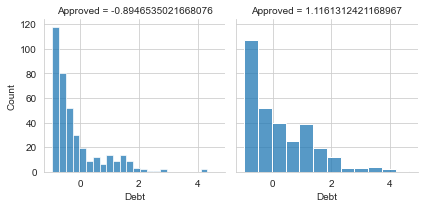

In [24]:
#sns.histplot(normalized_df["Debt"])

debt_hist = sns.FacetGrid(standardized_df, col='Approved')
debt_hist.map(sns.histplot, 'Debt')

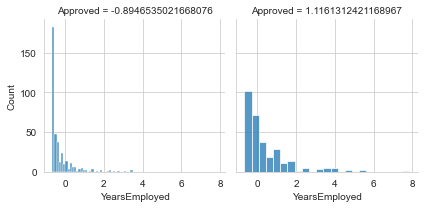

In [25]:
#sns.histplot(normalized_df["YearsEmployed"])

yearsemployed_hist = sns.FacetGrid(standardized_df, col='Approved')
yearsemployed_hist.map(sns.histplot, 'YearsEmployed')

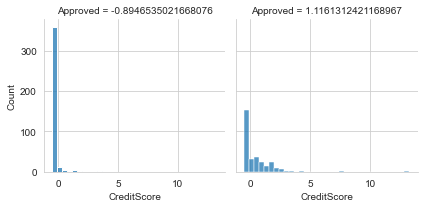

In [26]:
#sns.histplot(normalized_df["CreditScore"])

creditscore_hist = sns.FacetGrid(standardized_df, col='Approved')
creditscore_hist.map(sns.histplot, 'CreditScore')

(0.0, 200.0)

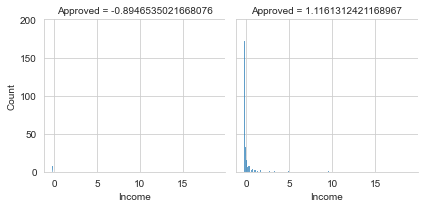

In [27]:
#sns.histplot(normalized_df["Income"])

income_hist = sns.FacetGrid(standardized_df, col='Approved')
income_hist.map(sns.histplot, 'Income')
plt.ylim(0,200)

<AxesSubplot:xlabel='Approved', ylabel='Count'>

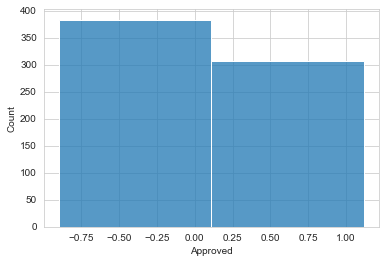

In [28]:
sns.histplot(standardized_df["Approved"],bins=2)

In [29]:
#to list all created dataframes, similar to R
%whos DataFrame

Variable                 Type         Data/Info
-----------------------------------------------
crx_data                 DataFrame        Male    Age    Debt M<...>\n[690 rows x 16 columns]
crx_data_clean           DataFrame        Male    Age    Debt M<...>\n[690 rows x 16 columns]
crx_data_filtered        DataFrame        Male    Age    Debt M<...>\n[690 rows x 16 columns]
crx_data_filtered_copy   DataFrame           Age    Debt  Years<...>n\n[690 rows x 6 columns]
final_df                 DataFrame           Debt  YearsEmploye<...>n\n[690 rows x 6 columns]
final_df2                DataFrame           Debt  YearsEmploye<...>\n[690 rows x 16 columns]
normalized_df            DataFrame             Debt  YearsEmplo<...>n\n[690 rows x 6 columns]
object_columns           DataFrame        Male Married BankCust<...>\n[690 rows x 10 columns]
standardized_df          DataFrame             Debt  YearsEmplo<...>n\n[690 rows x 6 columns]
test_age                 DataFrame           Debt  YearsEm

In [30]:
standardized_df.corr()

,Debt,YearsEmployed,CreditScore,Income,Approved,Age
Debt,1.000000,0.298902,0.271207,0.123121,0.206294,0.202661
YearsEmployed,0.298902,1.000000,0.322330,0.051345,0.322475,0.397802
CreditScore,0.271207,0.322330,1.000000,0.063692,0.406410,0.185115
Income,0.123121,0.051345,0.063692,1.000000,0.175657,0.018131
Approved,0.206294,0.322475,0.406410,0.175657,1.000000,0.163310
Age,0.202661,0.397802,0.185115,0.018131,0.163310,1.000000


In [31]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [32]:
#Statistical analysis for logistic regression, using all continuous variables
x_approved = standardized_df[['Debt', 'YearsEmployed', 'CreditScore','Income','Age']]
y_approved = final_df2['Approved']

model.fit(x_approved, y_approved)

print(model.coef_)

model_accuracy = model.score(x_approved,y_approved)
print(model_accuracy)

[[0.16421016 0.6945361  1.57068885 1.84022756 0.00705901]]
0.7695652173913043


In [33]:
#Statistical summary for logistic regression
import statsmodels.api as sm

res = sm.Logit(y_approved, x_approved).fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.497284
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Approved   No. Observations:                  690
Model:                          Logit   Df Residuals:                      685
Method:                           MLE   Df Model:                            4
Date:                Wed, 30 Mar 2022   Pseudo R-squ.:                  0.2762
Time:                        13:12:24   Log-Likelihood:                -343.13
converged:                       True   LL-Null:                       -474.08
Covariance Type:            nonrobust   LLR p-value:                 1.773e-55
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Debt              0.1604      0.101      1.591      0.112      -0.037       0.358
YearsEmployed     0.

In [34]:
#Statistical analysis for logistic regression, using 3 predictors
model2 = LogisticRegression()

x_approved2 = standardized_df[['Debt', 'YearsEmployed', 'CreditScore']]
y_approved2 = final_df2['Approved']

model2.fit(x_approved2, y_approved2)

print(model2.coef_)

model2_accuracy = model2.score(x_approved2,y_approved2)
print(model2_accuracy)

[[0.197654   0.67746399 1.69569487]]
0.7565217391304347


In [35]:
#split dataset into train and test, and set the random_state so it maintain the same result

from sklearn.model_selection import train_test_split

data_features = standardized_df[['Debt', 'YearsEmployed', 'CreditScore','Income','Age']]
data_target = final_df2['Approved']

x_train, x_test, y_train, y_test = train_test_split(data_features,
                                                    data_target,
                                                    test_size = 0.2,
                                                    random_state = 808)

In [36]:
#Logistic regression
model_lr = LogisticRegression()
fitted_model_lr = model_lr.fit(x_train,y_train)
test_predictions_lr = fitted_model_lr.predict(x_test)
accuracy_lr = fitted_model_lr.score(x_test,y_test)
print(fitted_model_lr.coef_)
print(accuracy_lr)

[[0.14363021 0.70905315 1.50100485 1.82423792 0.05006829]]
0.7246376811594203


In [37]:
#logistic regression accuracy score for train data set 
fitted_model_lr.score(x_train,y_train)

0.7735507246376812

In [38]:
#Decision tree
from sklearn import tree

model_clf = tree.DecisionTreeClassifier(random_state=101)
fitted_model_clf = model_clf.fit(x_train,y_train)
test_predictions_clf = fitted_model_clf.predict(x_test)
accuracy_clf = fitted_model_clf.score(x_test,y_test)
print(accuracy_clf)

0.6014492753623188


[Text(2243.8074551569507, 1587.8842105263157, 'CreditScore <= 0.021\ngini = 0.496\nsamples = 552\nvalue = [300, 252]\nclass = Approved'),
 Text(1567.4983183856502, 1502.0526315789473, 'YearsEmployed <= -0.272\ngini = 0.421\nsamples = 401\nvalue = [280, 121]\nclass = Approved'),
 Text(727.2141255605382, 1416.221052631579, 'Income <= 0.894\ngini = 0.302\nsamples = 259\nvalue = [211, 48]\nclass = Approved'),
 Text(697.1872197309417, 1330.3894736842105, 'Debt <= -0.902\ngini = 0.281\nsamples = 254\nvalue = [211, 43]\nclass = Approved'),
 Text(270.2421524663677, 1244.5578947368422, 'Age <= -0.849\ngini = 0.491\nsamples = 30\nvalue = [17, 13]\nclass = Approved'),
 Text(150.13452914798205, 1158.7263157894736, 'Income <= -0.191\ngini = 0.32\nsamples = 15\nvalue = [12, 3]\nclass = Approved'),
 Text(90.08071748878923, 1072.8947368421054, 'YearsEmployed <= -0.658\ngini = 0.153\nsamples = 12\nvalue = [11, 1]\nclass = Approved'),
 Text(60.053811659192824, 987.0631578947368, 'Age <= -1.109\ngini = 0

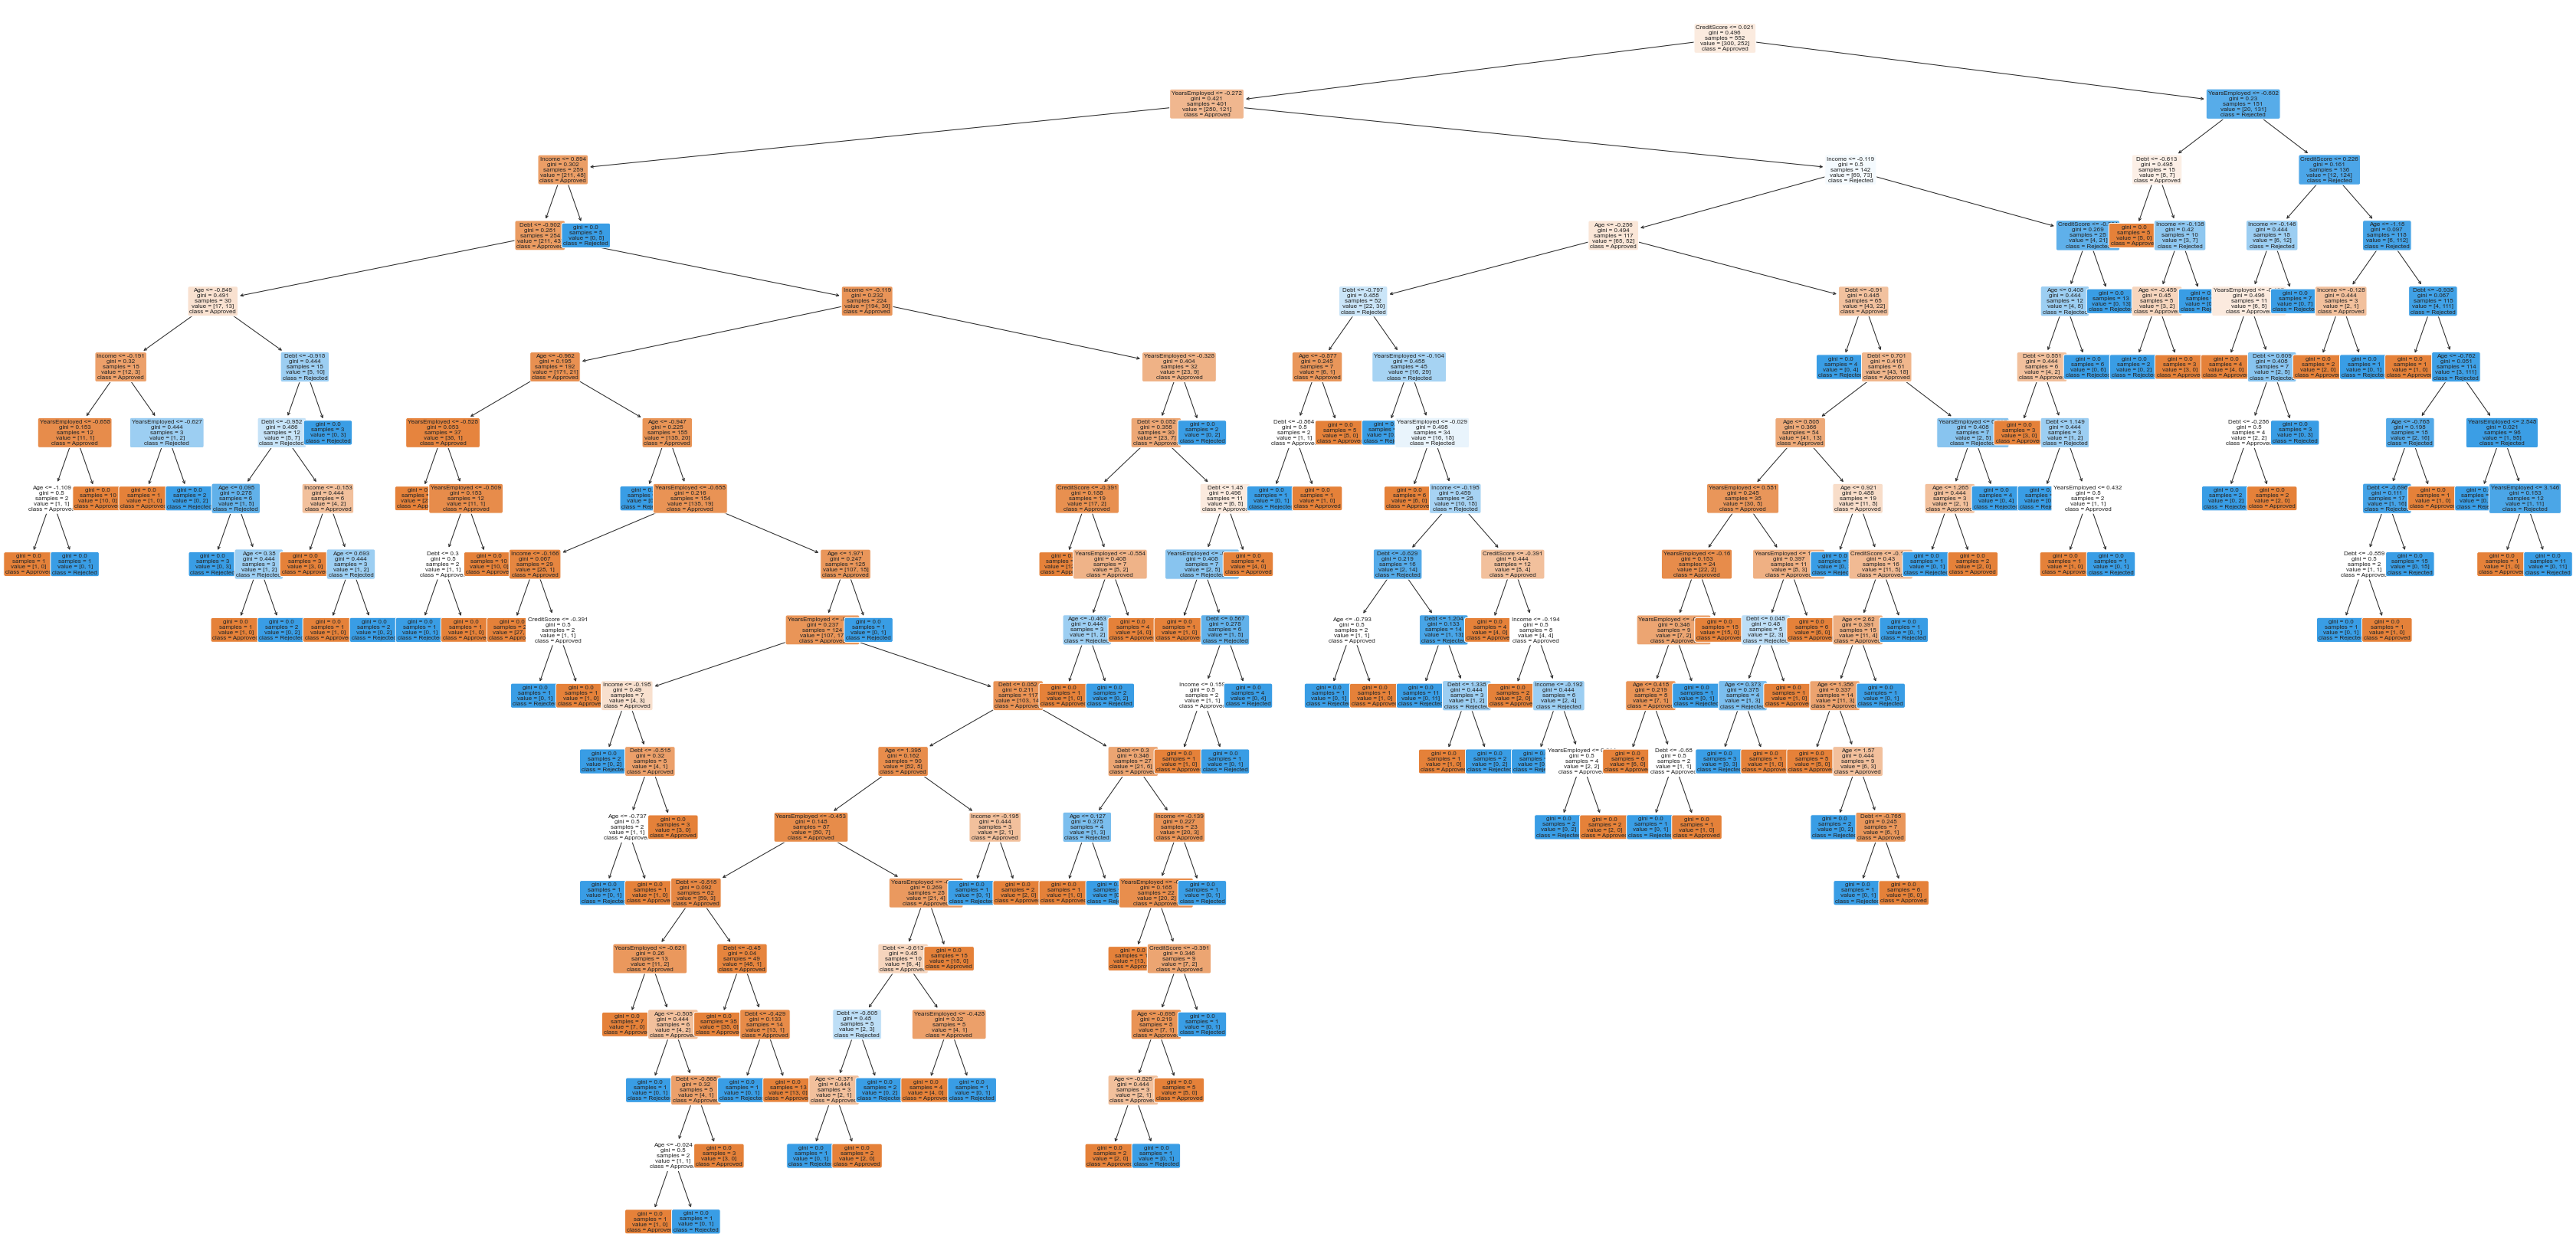

In [39]:
#Plot tree from decision tree
plt.figure(figsize=(60,30))
tree.plot_tree(fitted_model_clf,
          filled=True,
          rounded=True,
          class_names=["Approved","Rejected"],
          feature_names=['Debt', 'YearsEmployed', 'CreditScore','Income','Age'],
          fontsize=8)

In [76]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

model_rfc = RandomForestClassifier(max_features='sqrt',random_state=201)
fitted_model_rfc = model_rfc.fit(x_train,y_train)
test_predictions_rfc = fitted_model_rfc.predict(x_test)
accuracy_rfc = fitted_model_rfc.score(x_test,y_test)
print(accuracy_rfc)

0.7971014492753623


In [48]:
#SVM
from sklearn.svm import SVC

model_svm = SVC(kernel='linear')
fitted_model_svm = model_svm.fit(x_train,y_train)
test_predictions_svm = fitted_model_svm.predict(x_test)
accuracy_svm = fitted_model_svm.score(x_test,y_test)
print(accuracy_svm)

0.7246376811594203


In [42]:
#bagging (boostrap aggregation) is basically running one ML model (for example decision tree, SVM, logistical regression, etc) and run it in n number of random sampling, and average the result
from sklearn.model_selection import cross_val_score

#cv = the number of random sampling datasets
clf_for_cross_val = tree.DecisionTreeClassifier(random_state=800)
scores_for_cv = cross_val_score(clf_for_cross_val, data_features, data_target, cv = 5)
print(scores_for_cv)
print(scores_for_cv.mean())

[0.63768116 0.72463768 0.71014493 0.68115942 0.7173913 ]
0.6942028985507246


In [43]:
#bagging, need to explore the concept and what each parameter does
from sklearn.ensemble import BaggingClassifier

#n_estimators is a number of randomly sampled datasets, similar to cv
model_bag = BaggingClassifier(
    base_estimator = tree.DecisionTreeClassifier(),
    n_estimators = 200,
    max_samples = 0.8,
    oob_score = True,
    random_state = 801
)
fitted_model_bag = model_bag.fit(x_train,y_train)
test_predictions_bag = fitted_model_bag.predict(x_test)
accuracy_bag = fitted_model_bag.score(x_test,y_test)
print(accuracy_bag)
print(model_bag.oob_score_)

0.7753623188405797
0.7717391304347826


In [44]:
#bagging (boostrap aggregation) is basically running one ML model (for example decision tree, SVM, logistical regression, etc) and run it in n number of random sampling, and average the result

from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from time import time

model_bc = BaggingClassifier()

start = time()
cv0 = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=000)
score_for_cv = cross_val_score(model_bc, data_features, data_target, scoring = 'accuracy', cv=cv0, n_jobs = -1)

print(
    f"Mean Accuracy: {np.mean(score_for_cv):.3f}\nStd: {np.std(score_for_cv):.3f}\nRun time: {(time() - start):.3f}s"
)

Mean Accuracy: 0.758
Std: 0.038
Run time: 5.099s


In [61]:
%%time

#
res = {}
for i in [10, 25, 50, 100, 200, 800]:
    model_bc1 = BaggingClassifier(n_estimators=i, random_state=901)
    cv1 = RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=901)
    #n_jobs tells the computer on how many processors that it can use to compute, -1 means no restriction, 1 means 1 processor
    res[f'{i}'] = score_for_cv1 = cross_val_score(model_bc1, data_features, data_target, scoring = 'accuracy', cv=cv1, n_jobs = -1)
    #score_for_cv1 = cross_val_score(model_bc1, data_features, data_target, scoring = 'accuracy', cv=cv1, n_jobs = -1)

Wall time: 4.7 s


In [68]:
#it looks like the object generated from cross_val_score (numpy array) only stores either the last itteration or the highest itteration
print(score_for_cv1)
print(type(score_for_cv1))
print(score_for_cv1.mean())
#200
print(np.mean([0.79130435, 0.7826087 , 0.74347826, 0.73043478, 0.76521739,
       0.74782609]))
#100
print(np.mean([0.8       , 0.79130435, 0.72608696, 0.72608696, 0.76521739,
       0.73043478]))
#50
print(np.mean([0.8       , 0.77391304, 0.7173913 , 0.72608696, 0.7826087 ,
       0.75217391]))
#25
print(np.mean([0.78695652, 0.79565217, 0.73043478, 0.73043478, 0.76521739,
       0.73913043]))
#10
print(np.mean([0.75652174, 0.79565217, 0.73043478, 0.70869565, 0.76956522,
       0.70434783]))

[0.7826087  0.8        0.73478261 0.73043478 0.76956522 0.74782609]
<class 'numpy.ndarray'>
0.7608695652173912
0.7601449283333334
0.75652174
0.7586956516666666
0.7579710116666667
0.7442028983333334


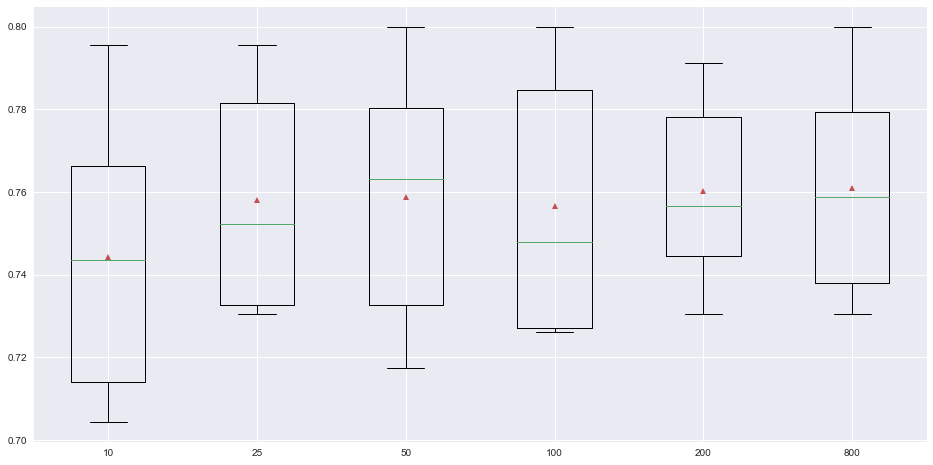

In [70]:
plt.style.use(style='seaborn')

plt.figure(1, figsize=(16,8))
boxplot_bag = plt.boxplot(res.values(), labels = res.keys(), showmeans=True)

In [67]:
print(res)
print(type(res))
list(res.keys())

{'10': array([0.75652174, 0.79565217, 0.73043478, 0.70869565, 0.76956522,
       0.70434783]), '25': array([0.78695652, 0.79565217, 0.73043478, 0.73043478, 0.76521739,
       0.73913043]), '50': array([0.8       , 0.77391304, 0.7173913 , 0.72608696, 0.7826087 ,
       0.75217391]), '100': array([0.8       , 0.79130435, 0.72608696, 0.72608696, 0.76521739,
       0.73043478]), '200': array([0.79130435, 0.7826087 , 0.74347826, 0.73043478, 0.76521739,
       0.74782609]), '800': array([0.7826087 , 0.8       , 0.73478261, 0.73043478, 0.76956522,
       0.74782609])}
<class 'dict'>


['10', '25', '50', '100', '200', '800']

In [71]:
%%time

#now we have determined the best n_estimators, let's find out the best max_samples (bootsrap sample), reduced max_samples meaning increase in variance and sometime leads to a better performance, max_samples default is 1 or 100% data
#a better generalization (better bias), go for higher max_samples; for a higher variance, go for lower max_samples
sam = {}
for i in [.1, .25, .5, .75, 1.]:
    model_bc1_bsp = BaggingClassifier(n_estimators=800, max_samples=i, random_state=902)
    cv1_bsp = RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=902)
    #n_jobs tells the computer on how many processors that it can use to compute, -1 means no restriction, 1 means 1 processor
    sam[f'{i*100}'] = score_for_cv1_bsp = cross_val_score(model_bc1_bsp, data_features, data_target, scoring = 'accuracy', cv=cv1_bsp, n_jobs = -1)
    #score_for_cv1 = cross_val_score(model_bc1, data_features, data_target, scoring = 'accuracy', cv=cv1, n_jobs = -1)

Wall time: 17 s


In [72]:
print(score_for_cv1_bsp)
print(type(score_for_cv1_bsp))
print(score_for_cv1_bsp.mean())
print(sam)

[0.74347826 0.75652174 0.77391304 0.74782609 0.76956522 0.77826087]
<class 'numpy.ndarray'>
0.7615942028985508
{'10.0': array([0.75217391, 0.82608696, 0.7826087 , 0.7826087 , 0.76521739,
       0.7826087 ]), '25.0': array([0.75217391, 0.82608696, 0.79130435, 0.8173913 , 0.76956522,
       0.79565217]), '50.0': array([0.75652174, 0.80869565, 0.8       , 0.8       , 0.76521739,
       0.77391304]), '75.0': array([0.74782609, 0.7826087 , 0.79130435, 0.77826087, 0.76521739,
       0.77391304]), '100.0': array([0.74347826, 0.75652174, 0.77391304, 0.74782609, 0.76956522,
       0.77826087])}


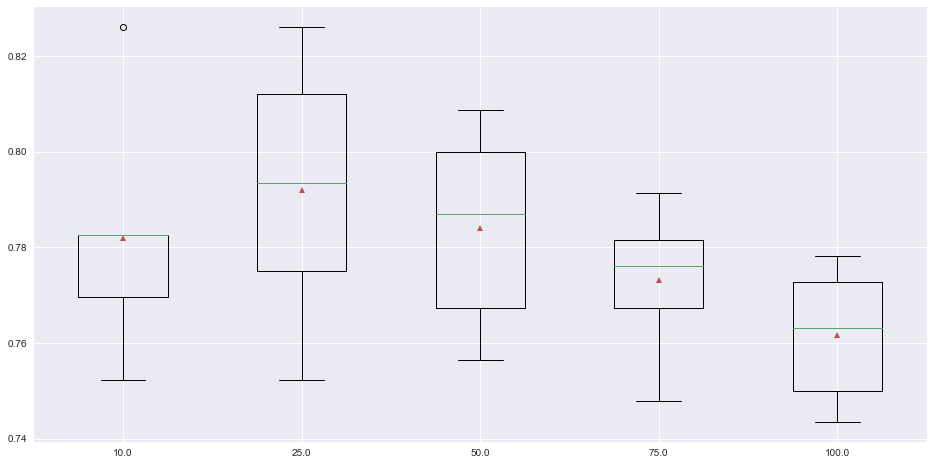

In [73]:
plt.figure(1, figsize=(16,8))
boxplot_bag_bsp = plt.boxplot(sam.values(), labels = sam.keys(), showmeans=True)

In [47]:
#extra: create a function that can return any accuracy score for any classifier
def get_score(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    return model.score(x_test, y_test)

Passive agressive notes:
1. On-line algorithm: Use for massive stream of data and want to learn on the fly. Example: twitter data. To big to store, so this alg grab a sample of the data, update classifier, and throw away said example.
2. If prediction is negative, that means it is wrong, then penalized. If the prediction is too close to the w, that means the prediction is correct, however we still need to penalize it since it is too close. If the prediction is >= 1, then the prediction is correct and no need to change
3. Penalized by how far off from 1; L (loss or penalty) = max (0,1 - y(d t w))
4. When this alg gets a new example and couldn't classify it perfectly (smaller than +1, < 1), it moves the weight factor (represented by the line) just enough to make the new dot product exactly +1. 
    This is why its being called aggressive, because it can changes everytime the new sample couldn't be classified perfectly (= +1). If the product (prediction) is okay (> +1), then the alg will not do anything (passive).
5. The w line is always perpendicular to the prediction/decision line
6. A good use case for this alg is detecting fake news on a social media like Twitter

In [80]:
#Passive Aggresive Classifier
from sklearn.linear_model import PassiveAggressiveClassifier

model_pac = PassiveAggressiveClassifier(C=0.5,random_state=301)
fitted_model_pac = model_pac.fit(x_train,y_train)
test_predictions_pac = fitted_model_pac.predict(x_test)
accuracy_pac = fitted_model_pac.score(x_test,y_test)
print(accuracy_pac)
print(fitted_model_pac.coef_)

0.6521739130434783
[[-1.0355466   1.85242245  1.54376879  1.50600173 -0.41428985]]


In [98]:
#Radius Neighbors Classifier
from sklearn.neighbors import RadiusNeighborsClassifier

model_rn = RadiusNeighborsClassifier(radius=9.4)
fitted_model_rn = model_rn.fit(x_train,y_train)
test_predictions_rn = fitted_model_rn.predict(x_test)
accuracy_rn = fitted_model_rn.score(x_test,y_test)
print(accuracy_rn)

0.6086956521739131


In [ ]:
%%time

#
res = {}
for i in [10, 25, 50, 100, 200, 800]:
    model_bc1 = BaggingClassifier(n_estimators=i, random_state=901)
    cv1 = RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=901)
    #n_jobs tells the computer on how many processors that it can use to compute, -1 means no restriction, 1 means 1 processor
    res[f'{i}'] = score_for_cv1 = cross_val_score(model_bc1, data_features, data_target, scoring = 'accuracy', cv=cv1, n_jobs = -1)
    #score_for_cv1 = cross_val_score(model_bc1, data_features, data_target, scoring = 'accuracy', cv=cv1, n_jobs = -1)